# Classification model using KNN

### 1. Import libraries

In [1]:
import pandas as pd
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.spatial import distance
from sklearn import model_selection

### 2. Upload Clinic data

In [2]:
path ='../../../../Data_preprocessing/Prediction PFS/RNA+Clinic joined/New/Clinical_data_and_RNA_22_Features_PFS.csv'
data = pd.read_csv(path)
data.head()

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,CTC-523E23.14,CTD-2050N2.1,DDX43P2,GLUD1P4,LINC01446,LINC01602,RNF212,RP11-123J14.1,RP11-326N17.1,RP11-353N14.5
0,0,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,962.0,-16.406250,12.164384,0.766909,...,21.01388,21.02976,20.99861,21.07023,20.99572,21.03733,30.21949,21.00825,20.99301,21.10114
1,1,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,67.0,0.0,0.0,2.0,254.0,-40.000000,5.490411,0.773269,...,21.01388,21.02976,20.99861,21.07023,22.16510,21.03733,30.76723,21.00825,20.99301,21.10114
2,2,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,62.0,0.0,0.0,1.0,800.0,-89.436620,61.906849,1.782859,...,21.01388,21.02976,20.99861,21.07023,20.99572,21.03733,27.61482,21.00825,20.99301,21.10114
3,3,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,60.0,0.0,0.0,3.0,790.0,11.787072,1.249315,5.890573,...,21.01388,21.02976,20.99861,21.07023,20.99572,21.03733,32.89925,21.00825,20.99301,21.10114
4,4,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,76.0,0.0,0.0,2.0,1241.0,0.000000,5.654795,1.374775,...,21.01388,21.02976,20.99861,21.07023,20.99572,21.03733,23.21111,21.00825,20.99301,21.10114


In [3]:
Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    elif data.PFS[i]<6: # If PFS is over 6 months, I will consider it as Responder (R)
        Y.append(1)
    else:
        Y.append(2) # If PFS is between 3 and 6 months, I will consider it as SemiResponder (SR)
        

data = data.drop('PFS', axis=1)
data = data.drop('RNA_ID', axis=1)

print(data.head())
X = data.iloc[:,1:57] 
# I selected all the columns by removing the Unnamed column (row id) and the Target column.
print(X)
print('Numero de pacientes: ',len(Y))

   Unnamed: 0   Age  Sarc  Rhab  Number_of_Prior_Therapies  \
0           0  62.0   0.0   0.0                        2.0   
1           1  67.0   0.0   0.0                        2.0   
2           2  62.0   0.0   0.0                        1.0   
3           3  60.0   0.0   0.0                        3.0   
4           4  76.0   0.0   0.0                        2.0   

   Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy  \
0                                              962.0             
1                                              254.0             
2                                              800.0             
3                                              790.0             
4                                             1241.0             

   Tumor_Shrinkage  TM_TC_Ratio  Cohort_CM-009  Cohort_CM-010  ...  \
0       -16.406250     0.766909              0              1  ...   
1       -40.000000     0.773269              0              1  ...   
2       -89.436620  

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125)

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Study the best value for K

In [5]:
neighbors = list(range(1,8))
cek = []
list_accuracy = []
best_acuracy = 0
best_k = 0
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    pred = knn.fit(XTrain, yTrain).predict(XTest)
    if accuracy_score(yTest, pred) >= best_acuracy:
        best_k = k
        best_acuracy=accuracy_score(yTest, pred)
    list_accuracy.append(accuracy_score(yTest, pred))

print("Best accuracy is obtained with k = " + str(best_k)+ " and is: %.4f" % (best_acuracy))


Best accuracy is obtained with k = 7 and is: 0.5405


C:\Users\sandr\AppData\Local\Temp/ipykernel_12940/3738168230.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
C:\Users\sandr\AppData\Local\Temp/ipykernel_12940/3738168230.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(best_k, best_acuracy, 'ro', color ='g')


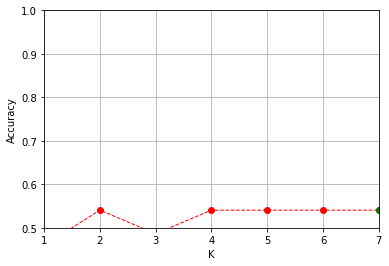

In [6]:
plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
# Green dot represent best K value
plt.plot(best_k, best_acuracy, 'ro', color ='g')
plt.axis([1, 7, 0.5, 1])
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.grid()
plt.show()

### 5. Best metric study (manhattan or euclidean)

In [7]:
from sklearn import neighbors
# Euclidean distance model
euclid_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.sqeuclidean)
euclid_model.fit(XTrain,yTrain) 

# Manhattan distance model
manhattan_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.cityblock) 
manhattan_model.fit(XTrain, yTrain)

KNeighborsClassifier(metric=<function cityblock at 0x0000022E040DD280>,
                     n_neighbors=7)

In [8]:
manhattan_predictions = manhattan_model.predict(XTest)
euclid_predictions = euclid_model.predict(XTest) 
df = pd.DataFrame({'actual': yTest, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()

,actual,manhattan,euclid
0,1,1,0
1,0,0,0
2,0,2,2
3,2,0,0
4,2,0,0


In [9]:
result1= model_selection.cross_val_score(euclid_model, XTrain, yTrain, cv=5, scoring='accuracy')
result2 = model_selection.cross_val_score(manhattan_model, XTrain, yTrain, cv=5, scoring='accuracy')
print("Best result of the cross validation of the model (euclidean) with the best paramters:" +str(np.mean(result1)))
print("Best result of the cross validation of the model (manhattan) with the best paramters:" +str(np.mean(result2)))

Best result of the cross validation of the model (euclidean) with the best paramters:0.5551724137931033
Best result of the cross validation of the model (manhattan) with the best paramters:0.5694581280788178


#### 6.1. Manhattan model

In [10]:
# Making predictions with the optimal model on the training dataset
yhatTrain = manhattan_model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [11]:
# Making predictions with the optimal model on the test dataset
mayhatTest = manhattan_model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (mayhatTest[i] == yTest[i]):
        contTest = contTest + 1

In [12]:
print('Precisión final en el conjunto de datos de entrenamiento (manhattan): ' + str(contTrain/len(yTrain)))
print('Precisión final en el conjunto de datos de prueba (manhattan): ' + str(contTest/len(yTest)))

Precisión final en el conjunto de datos de entrenamiento (manhattan): 0.6875
Precisión final en el conjunto de datos de prueba (manhattan): 0.5405405405405406


In [13]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[57  2  6]
 [10 13  5]
 [15  7 29]]
Input data:  [0 2 1 1 1 1 0 2 0 1 2 2 1 0 2 0 2 0 0 0 2 1 0 0 2 2 0 1 0 0 1 1 0 2 1 0 1
 2 0 2 2 0 0 1 0 1 1 0 1 0 0 1 0 0 0 2 0 2 0 2 1 0 2 2 0 2 2 2 0 2 0 2 0 2
 2 0 0 2 0 0 1 2 1 0 0 0 0 2 1 2 2 0 0 2 2 2 2 0 0 0 2 0 2 0 0 0 0 1 0 2 0
 2 0 2 1 0 0 0 0 1 2 2 0 2 0 2 2 0 1 2 0 1 2 0 0 2 2 1 2 1 2 2 0 0]
Prediction:        [1 2 0 2 1 0 0 2 0 0 2 2 1 0 2 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 1 0 0
 1 0 2 2 0 0 1 2 1 1 0 1 0 2 0 0 0 0 2 0 2 0 0 1 2 2 1 0 1 0 2 0 1 0 2 0 2
 2 0 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 0 0 1 0 2 0 0 0 0 1 0 2 0
 2 2 0 1 0 2 0 0 0 2 2 0 1 0 0 0 0 1 0 0 1 2 0 0 2 2 2 2 1 0 2 0 0]


In [14]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78        65
           1       0.59      0.46      0.52        28
           2       0.72      0.57      0.64        51

    accuracy                           0.69       144
   macro avg       0.67      0.64      0.64       144
weighted avg       0.69      0.69      0.68       144



In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yTest, mayhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(mayhatTest))

----------------Confusion Matrix (Test)------------------
[[16  2  2]
 [ 1  2  0]
 [ 6  6  2]]
Input data:  [1 0 0 2 2 1 0 2 2 2 0 0 0 0 0 0 2 0 1 0 0 0 0 2 0 0 2 2 2 0 0 2 0 0 2 2 2]
Prediction:        [1 0 2 0 0 1 0 1 0 1 0 1 0 2 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 2 0 0 0 1 2]


In [16]:
print(classification_report(yTest, mayhatTest))

              precision    recall  f1-score   support

           0       0.70      0.80      0.74        20
           1       0.20      0.67      0.31         3
           2       0.50      0.14      0.22        14

    accuracy                           0.54        37
   macro avg       0.47      0.54      0.42        37
weighted avg       0.58      0.54      0.51        37

